In [1]:
%pylab notebook
from serial import Serial
rcParams["axes.grid"] = True

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


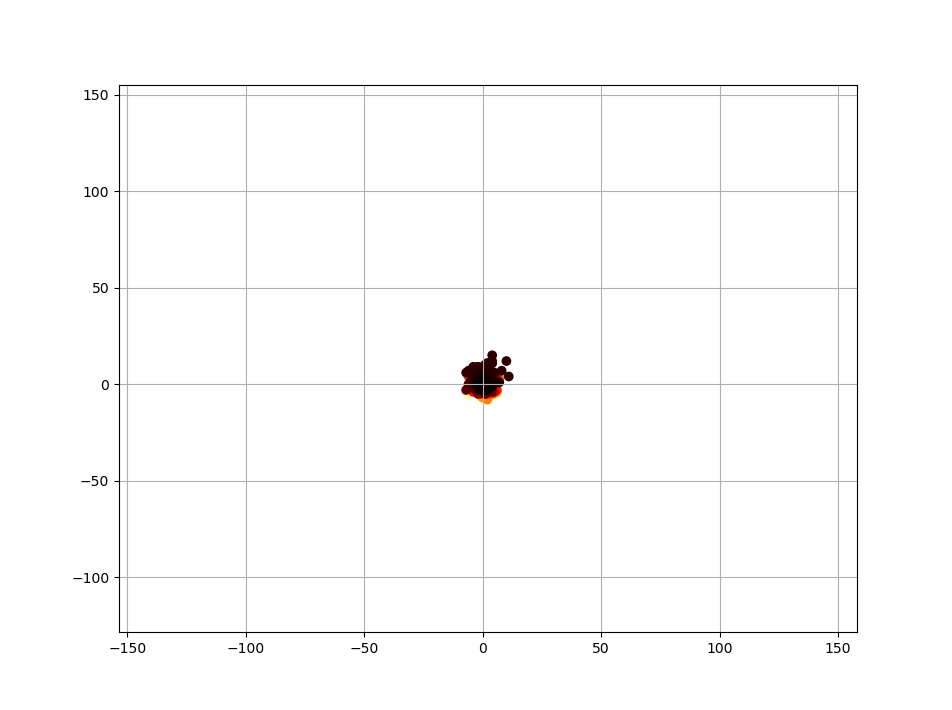

(-300.0, 300.0, -300.0, 300.0)

In [23]:
dats = zeros([1024, 3], dtype=int)
fig, ax = subplots(1, 1)
ls = ax.scatter(dats[:, 0], dats[:, 1], c=linspace(0, 1, dats.shape[0]), cmap='hot_r')
ax.axis((-300, 300, -300, 300))

In [30]:
s = Serial('/dev/ttyUSB0', 115200, timeout=1)

def ploti():
    global dats
    while True:
        dats = roll(dats, -1, 0)
        dat = fromstring(s.readline(), dtype=int, sep=',')
        if len(dat) != 3:
            continue
        dats[-1, :] = dat
        ls.set_offsets(dats[:, :2])
        fig.canvas.draw_idle()
        
threading.Thread(target=ploti).start()

<ipython-input-30-c485559cfc07>:7: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  dat = fromstring(s.readline(), dtype=int, sep=',')


In [29]:
s.close()

Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-28-135625760840>", line 7, in ploti
  File "/usr/local/lib/python3.8/dist-packages/serial/serialposix.py", line 493, in read
    buf = os.read(self.fd, size - len(read))
TypeError: an integer is required (got type NoneType)
